после просмотра презентации настало время практики 🙌

In [1]:
# установка библиотеки
# ! pip3 list
! pip3 install sklearn

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


# Naive Bayes (Наивный Байес)

Давайте сделаем простую классификацию писем на "спам/не спам". Например, на [этих данных](https://www.kaggle.com/uciml/sms-spam-collection-dataset)



In [2]:
# ячейка импортов

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm

# from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline 

In [3]:
! ls

archive.zip     class1.ipynb    intro_to_ML.pdf readme.md       spam.csv


In [4]:
# читаем данные

data = pd.read_csv('spam.csv', encoding='latin-1') # обратите внимание на кодировку
data.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [5]:
# Почистим датафрейм

data = data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

data = data.rename(columns={"v1": "spam", "v2": "content"})


display(data)

,spam,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


давайте посчитаем распределение спама/не спама

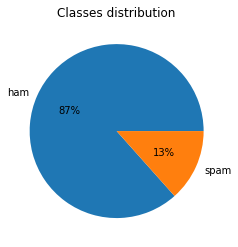

In [6]:
classes =pd.value_counts(data["spam"])

classes.plot(kind = 'pie',  autopct='%0.f%%') 
# про string formatting https://realpython.com/python-string-formatting/

plt.title("Classes distribution")

plt.ylabel('')

plt.show()

**Анализ данных**

Давайте найдем частоты слов в сообщениях (отдельно для подкорпуса спама и не-спама). Для будущего алгоритма, слова будут признаками (features)

Для этого используем Counter из collections.

In [7]:
Counter(" ".join(data[data['spam']=='ham']["content"]).split()).most_common(50) 

[('to', 1530),
 ('you', 1458),
 ('I', 1436),
 ('the', 1019),
 ('a', 969),
 ('and', 738),
 ('i', 736),
 ('in', 734),
 ('u', 645),
 ('is', 638),
 ('my', 619),
 ('me', 537),
 ('of', 498),
 ('for', 475),
 ('that', 398),
 ('it', 375),
 ('your', 373),
 ('on', 352),
 ('have', 346),
 ('at', 333),
 ('not', 320),
 ('are', 319),
 ('be', 314),
 ('will', 291),
 ('2', 284),
 ('get', 281),
 ('can', 279),
 ("I'm", 278),
 ('&lt;#&gt;', 276),
 ('but', 275),
 ('so', 272),
 ('with', 248),
 ('do', 233),
 ('U', 229),
 ('when', 224),
 ('up', 222),
 ('.', 222),
 ('go', 219),
 ('if', 218),
 ('like', 209),
 ('we', 209),
 ('know', 202),
 ('got', 200),
 ('come', 197),
 ('all', 191),
 ('was', 191),
 ('call', 191),
 ('just', 189),
 ('or', 188),
 ('You', 186)]

In [8]:
# заберем все слова по условию, заджойним в строку, разобьем по пробелам, возьмем топ-20
count1 = Counter(" ".join(data[data['spam']=='ham']["content"]).lower().split()).most_common(20) 
df1 = pd.DataFrame.from_dict(count1) # новый дф
df1 = df1.rename(columns={0: "words in non-spam", 1 : "count"})

# тот же набор операций для второго подкорпуса
count2 = Counter(" ".join(data[data['spam']=='spam']["content"]).lower().split()).most_common(20)
df2 = pd.DataFrame.from_dict(count2)
df2 = df2.rename(columns={0: "words in spam", 1 : "count"})

display(df1,df2)

,words in non-spam,count
0,i,2172
1,you,1665
2,to,1544
3,the,1113
4,a,1046
5,u,874
6,and,845
7,in,786
8,my,741
9,is,710


,words in spam,count
0,to,682
1,a,373
2,call,342
3,your,263
4,you,252
5,the,204
6,for,201
7,or,188
8,free,180
9,2,169


очень много "шума", давайте избавимся от стоп-слов. Используем [эту функцию](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) из sklearn 

In [9]:
f = feature_extraction.text.CountVectorizer(stop_words = 'english')

In [10]:
data["content"]

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: content, Length: 5572, dtype: object

### пример на маленькой матрице

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = ['This is the first document.','Is this my the second document?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())
display(X.toarray())



['document', 'first', 'is', 'my', 'second', 'the', 'this']


array([[1, 1, 1, 0, 0, 1, 1],
       [1, 0, 1, 1, 1, 1, 1]])

### идем дальше

In [12]:
X = f.fit_transform(data["content"])
# print(f.get_feature_names()) # посмотрим на признаки

display(X.shape)
display(X.toarray())

(5572, 8404)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

метод ```.fit_transform()``` выучивает обучающие данные и возвращает матрицу формата "документ-термин" для всего датасета

Сейчас у нас 8404 признака (по числу уникальных слов в корпусе). Новый признак  j  в ряду i  равен 1 если слово j  появляется в тексте i . В ином случае значение признака = 0

**давайте попробуем предсказать:** окажется ли письмо спамом или не спамом

Следует помнить о двух нежелательных вариантах:

- спам-письмо классифицируется как нормальное (False Negative)
- обычное письмо классифицируется как спам (False positive).
(какой вариант хуже?)

Сначала, представим значения spam/ham как числовые (1,0) 

In [13]:
data

,spam,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


Затем разделим данные на обучающую и тестовую выборку [этой функцией](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [14]:
data["spam"]=data["spam"].map({'spam':1,'ham':0}) # в первой колонке переименуем значения 'spam' в 1  и 'ham' в 0

data

,spam,content
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


Создадим новые переменные:
- X_train - кусочек матрицы "документ/термин", который мы "отдадим" алгоритму для обучения
- X_test - кусочек матрицы "документ/термин", на котором будем проверять, как алгоритм сработал 
- y_train - кусочек датафрейма с текстами, который мы отдадим для обучения
- y_test -  кусочек датафрейма с текстами, на котором будем проверять, как алгоритм сработал 

In [15]:
# новые переменные
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, data['spam'], 
                                                                    test_size=0.2, random_state=50)

# print(X_train.shape, X_test.shape)
sum(y_test == 1)

161

алгоритмов наивного байеса несколько, мы возьмем [Multinomial NB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)

[дополнительная информация про Naive Bayes](https://nlp.stanford.edu/IR-book/pdf/13bayes.pdf)

Так как алгоритм быстрый, попробуем несколько вариантов с разным параметром регуляризации α *([что такое α ?](https://medium.com/syncedreview/applying-multinomial-naive-bayes-to-nlp-problems-a-practical-explanation-4f5271768ebf))*

Затем для каждого проверим Precision, Recall и Accuracy

In [16]:
list_alpha = np.arange(1/100000, 20, 0.11) 
#возьмем лист равномерно распределенных значений от 1/100000 до 20(можно выбрать другие числа,эти были выбраны экспериментально)


score_train = np.zeros(len(list_alpha)) # задали пустые списки по длине изначального листа
score_test = np.zeros(len(list_alpha))
recall_test = np.zeros(len(list_alpha))
precision_test= np.zeros(len(list_alpha))
count = 0

In [17]:
for alpha in list_alpha: # для каждого значения в списке альф
    bayes = naive_bayes.MultinomialNB(alpha=alpha) # используем модель
    bayes.fit(X_train, y_train) # тренируем модель
    
    score_train[count] = bayes.score(X_train, y_train) # итерируемся по индексу в листе, добавляем значения accuracy
    # score_train? 
    
    score_test[count]= bayes.score(X_test, y_test)
    # score_test ? 
    
    recall_test[count] = metrics.recall_score(y_test, bayes.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, bayes.predict(X_test))
    
    count = count + 1 # после одной итерации, делаем новый шаг

посмотрим на 10 лучших моделей

In [18]:
matrix = np.matrix(np.c_[list_alpha, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['alpha', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])


display(models.head(10))

display(matrix.shape)

,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,0.00001,0.997756,0.976682,0.919255,0.919255
1,0.11001,0.996635,0.978475,0.944099,0.910180
2,0.22001,0.995961,0.978475,0.950311,0.905325
3,0.33001,0.995513,0.982960,0.950311,0.932927
4,0.44001,0.995288,0.982063,0.950311,0.927273
5,0.55001,0.994840,0.981166,0.944099,0.926829
6,0.66001,0.994840,0.981166,0.937888,0.932099
7,0.77001,0.994840,0.980269,0.931677,0.931677
8,0.88001,0.994840,0.979372,0.925466,0.931250
9,0.99001,0.994840,0.977578,0.913043,0.930380


(182, 5)


а теперь давайте оставим модель с наивысшей test precision

In [19]:
best_index = models['Test Precision'].idxmax()
best_index

# display(best_index)

display(models.iloc[best_index])

alpha             5.830010
Train Accuracy    0.990128
Test Accuracy     0.976682
Test Recall       0.838509
Test Precision    1.000000
Name: 53, dtype: float64

Посмотрим, есть ли модели со 100% Precision

In [20]:
models[models['Test Recall']>0.9].sort_values(by="Test Precision", ascending = False)


,alpha,Train Accuracy,Test Accuracy,Test Recall,Test Precision
17,1.87001,0.993718,0.980269,0.900621,0.960265
16,1.76001,0.993493,0.980269,0.900621,0.960265
12,1.32001,0.994840,0.979372,0.900621,0.953947
15,1.65001,0.993493,0.979372,0.900621,0.953947
14,1.54001,0.994166,0.979372,0.900621,0.953947
13,1.43001,0.994615,0.979372,0.900621,0.953947
3,0.33001,0.995513,0.982960,0.950311,0.932927
6,0.66001,0.994840,0.981166,0.937888,0.932099
7,0.77001,0.994840,0.980269,0.931677,0.931677
8,0.88001,0.994840,0.979372,0.925466,0.931250


Давайте из них выберем те, у которых наибольшее accuracy

In [21]:
best_index = models[models['Test Precision']==1]['Test Accuracy'].idxmax()

models.iloc[best_index]


alpha             5.830010
Train Accuracy    0.990128
Test Accuracy     0.976682
Test Recall       0.838509
Test Precision    1.000000
Name: 53, dtype: float64

### сделаем предикшн

In [22]:
bayes = naive_bayes.MultinomialNB(alpha= 5.830010) # используем лучшую модель
bayes.fit(X_train, y_train) # тренируем алгоритм на данных

bayes.predict(X_test) # метод для предсказания

# сделаем датафрейм с колонками для настоящего класса и для предсказанного

new_df = pd.DataFrame(data = y_test)
new_df["predicted"]=bayes.predict(X_test) # добавляем новую колонку с предсказаниями

new_df

,spam,predicted
3409,0,0
2103,0,0
2665,0,0
3239,0,0
1205,0,0
...,...,...
5020,0,0
2141,0,0
1265,0,0
4094,0,0


давайте построим матрицу ошибок ([как работает матрица ошибок](https://en.wikipedia.org/wiki/Confusion_matrix))

In [23]:
m_confusion_test = metrics.confusion_matrix(y_test, bayes.predict(X_test))


pd.DataFrame(data = m_confusion_test, columns = ['Predicted ham', 'Predicted spam'],
            index = ['Actual ham', 'Actual spam'])

,Predicted ham,Predicted spam
Actual ham,954,0
Actual spam,26,135


Заметим, что так как мы определили лейбл spam как класс 1, наша табличка "перевернута" и начинается с True Negative (Actual ham x Predicted ham) 
Сколько сообщений получились False Positive? Сколько False Negative?

# Support Vector Machines (SVM, метод опорных векторов)

попробуем сделать ту же задачу, с алгоритмом SVM

In [24]:
list_C = np.arange(500, 2000, 100) #100000

score_train = np.zeros(len(list_C))
score_test = np.zeros(len(list_C))
recall_test = np.zeros(len(list_C))
precision_test= np.zeros(len(list_C))
count = 0
for C in list_C:
    svc = svm.SVC(C=C)
    svc.fit(X_train, y_train)
    score_train[count] = svc.score(X_train, y_train)
    score_test[count]= svc.score(X_test, y_test)
    recall_test[count] = metrics.recall_score(y_test, svc.predict(X_test))
    precision_test[count] = metrics.precision_score(y_test, svc.predict(X_test))
    count = count + 1 

посмотрим на 10 первых моделей и их метрики:

In [25]:
matrix = np.matrix(np.c_[list_C, score_train, score_test, recall_test, precision_test])
models = pd.DataFrame(data = matrix, columns = 
             ['C', 'Train Accuracy', 'Test Accuracy', 'Test Recall', 'Test Precision'])
models.head(n=10)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,1.0,0.970404,0.801242,0.992308
1,600.0,1.0,0.970404,0.801242,0.992308
2,700.0,1.0,0.970404,0.801242,0.992308
3,800.0,1.0,0.970404,0.801242,0.992308
4,900.0,1.0,0.970404,0.801242,0.992308
5,1000.0,1.0,0.970404,0.801242,0.992308
6,1100.0,1.0,0.970404,0.801242,0.992308
7,1200.0,1.0,0.970404,0.801242,0.992308
8,1300.0,1.0,0.970404,0.801242,0.992308
9,1400.0,1.0,0.970404,0.801242,0.992308


выберем модель с лучшим test precision

In [26]:
best_index = models['Test Precision'].idxmax()

display(models.iloc[best_index, :])

C                 500.000000
Train Accuracy      1.000000
Test Accuracy       0.970404
Test Recall         0.801242
Test Precision      0.992308
Name: 0, dtype: float64

In [27]:
# посмотрим на модели с почти 100% Precision

models[models['Test Precision']>0.99].head(5)

,C,Train Accuracy,Test Accuracy,Test Recall,Test Precision
0,500.0,1.0,0.970404,0.801242,0.992308
1,600.0,1.0,0.970404,0.801242,0.992308
2,700.0,1.0,0.970404,0.801242,0.992308
3,800.0,1.0,0.970404,0.801242,0.992308
4,900.0,1.0,0.970404,0.801242,0.992308


In [28]:
best_index = models[models['Test Precision']>0.99]['Test Accuracy'].idxmax()
svc = svm.SVC(C=list_C[best_index])
svc.fit(X_train, y_train)
models.iloc[best_index, :]

C                 500.000000
Train Accuracy      1.000000
Test Accuracy       0.970404
Test Recall         0.801242
Test Precision      0.992308
Name: 0, dtype: float64

построим матрицу ошибок для SVM

In [29]:
m_confusion_test = metrics.confusion_matrix(y_test, svc.predict(X_test))
pd.DataFrame(data = m_confusion_test, columns = ['Predicted 0', 'Predicted 1'],
            index = ['Actual 0', 'Actual 1'])

,Predicted 0,Predicted 1
Actual 0,953,1
Actual 1,32,129
